# HW3 Problem 1 (15 points): Linear Regression [TA: Vodelina Samatova]

In this exercise, you will apply linear regression and Lasso regression methods to the dataset supplied to you and then compare their results to determine whether Lasso regression is needed for this dataset. Additionally, you will use sklearn's pipeline framework, which is so helpful when you have a sequence of transforms (e.g. normalization) and estimators (e.g. classifiers or regressors).

**Note**: This assignment will have less provided code - you have to write most of it yourself. Remember to use prior homeworks as examples, and **always use the suggested random seed** to ensure the test cases work as provided.

**Dataset description**: You are provided a dataset with 20 variables. Variables $x1\ -\ x19$ refer to the independent variables, while variable $y$ is your dependent variable. Training data is stored in the file `./regression-train.csv`.

**Note on Test Cases**: TAs will use a test set to verify your solution. The format (independent variables $x1\ -\ x19$, dependent variable  $y$) will be same, but TAs' file may contain different number of data points than the split version from training set. Please ensure you take this into account, and do not hard code any dimensions.


In [2]:
import warnings
warnings.filterwarnings('ignore')

## Part 0: Add necessary imports

As you work through the homework, don't forget to add imports.
We often put imports at the top of the file.
For this assignment, you'll likely want to import pandas and numpy.

In [1]:
#Import necessary library
import numpy as np
import pandas as pd


## Part 1: Linear Regression and Lasso Regression

You will write code to normalize and train simple linear regression and Lasso Regression using scikit-learn.

### 1.1 Loading Dataset

Load a dataset into pandas data frame `df` from this file: `./regression-train.csv`, assign columns $x1\ -\ x19$ to a variable `X`, and assign column $y$ to a variable `y`.

In [2]:
# TODO: Read the data
df = pd.read_csv('./regression-train.csv')

# Assigning feature columns to X and target column to y
X = df.loc[:, 'x1':'x19']
y = df['y']

# TODO: Output the data
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,y
0,508,44,60,718,42,234,0,0,56,52,8,216,0,1998,472,136,236,12,4,610.0
1,1020,106,198,1620,126,680,2,2,112,104,36,614,0,5744,1642,294,348,14,20,2300.0
2,1118,146,828,704,32,698,2,2,96,122,18,842,0,6324,1748,282,718,16,4,1850.0
3,922,70,452,222,48,150,0,0,108,108,22,152,2,1360,320,224,98,4,36,270.0
4,526,60,294,162,18,164,2,2,52,46,8,166,0,1776,440,140,172,8,2,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,630,50,78,996,48,188,2,2,70,120,26,136,0,1260,302,152,110,6,26,310.0
128,330,32,38,664,4,20,0,2,26,18,4,36,2,392,88,78,36,6,4,150.0
129,1146,156,262,2628,194,840,0,0,170,120,24,940,0,6396,1714,288,664,16,18,1920.0
130,472,22,398,250,2,128,0,0,54,30,26,232,2,2230,540,112,114,8,0,460.0


In [3]:
import numpy as np
np.testing.assert_equal(df.shape, (132,20))

In [ ]:
# Note: we will run hidden test cases too


### 1.2 Train/Test Split

Create a 80% train / 20% test split, using **0** as the random state.

In [4]:
from sklearn.model_selection import train_test_split

#TODO
X_train = None
X_test = None
y_train = None
y_test = None
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [5]:
np.testing.assert_equal(X_train.shape, (105,19))
np.testing.assert_equal(X_test.shape, (27,19))

In [ ]:
# Note: we will run hidden test cases too


### 1.3 Linear Regression v.s. Lasso CV

In this section you will compare a LinearRegression with standard hyperparameters to a LassoCV model.

Before your begin, read the documentation on sklearn's [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) and [LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) - a Lasso regression model that uses CV to tune its hyperparameters.

**Note** that the lasso regression model has *built-in* crossvalidation, which it performs on the training dataset provided, to select the best shrinkage coefficient for the validation data.

For regression, it is particularly important to normalize our data before training the model (ensuring all variables are on the same scale), so we can better interpret our coefficients. For both models, make sure data is scaled first using **a standard scaler**, fit to the training data. Hint: you can use the sklearn's [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to achieve this.

Note that we could use a pipeline for this process, but to make things easier, we will instead normalize our `X_train` and `X_test` variables.

Complete the following:
1. Fit a StandardScaler to the training dataset, and the normalize the training and test datasets. (**Note**: we fit the scale only to the training dataset - just like our model - we cannot use the test dataset to fit any part of our pipeline). 
2. Create both a LinearRegression model, and a LassoCV that uses **10 folds** for cross-validation and has a random state of **0**. 
3. Then fit both models to the normalized training dataset.

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV

#TODO
scaler = None
linear_regressor = None
Lasso_regressor = None

# Step 1: Normalize the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit on training data and transform
X_test= scaler.transform(X_test)  # Transform test data using the same scaler

# Step 2: Initialize the models
linear_regressor = LinearRegression()
Lasso_regressor = LassoCV(cv=10, random_state=0)  # 10-fold CV, random_state for reproducibility

# Step 3: Fit both models to the normalized training data
linear_regressor.fit(X_train, y_train)
Lasso_regressor.fit(X_train, y_train)


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11406.719200067222, tolerance: 7680.090310965279
  model = cd_fast.enet_coordinate_descent_gram(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12069.976626124233, tolerance: 7680.090310965279
  model = cd_fast.enet_coordinate_descent_gram(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11717.932559236884, tolerance: 7680.090310965279
  model = cd_fast.enet_coordinate_descent_gram(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/line

LassoCV(cv=10, random_state=0)

In [11]:
# Test that the training dataset has been normalized
# Go through each attribute
for i in range(X_train.shape[1]):
    # Assert that the mean is near 0 and the standard deviation is near 1
    np.testing.assert_almost_equal(np.mean(X_train[:,i]), 0)
    np.testing.assert_almost_equal(np.std(X_train[:,i]), 1)

np.testing.assert_almost_equal(scaler.n_features_in_, 19)
np.testing.assert_almost_equal(linear_regressor.n_features_in_, 19)
np.testing.assert_almost_equal(Lasso_regressor.n_features_in_, 19)

In [ ]:
# Note: we will run hidden test cases too


### 1.5 Inference and Evaluation
Calculate the training and testing RMSE for both models and assign them to the corresponding variables.

Which model do you expect will have lower training error? What about testing error? Why?

**ANSWER HERE**

For training error,Linear Regression is expected to have lower training error because it fits the data without regularization, potentially overfitting to the training set.

For testing Error, Lasso is expected to have lower testing error due to its L1 regularization, which prevents overfitting and helps the model generalize better to unseen data.

In [12]:
# Note: You can use this function to calcualte rmse when true value and prediction values are known.
import math
import sklearn
def calculate_rmse(y_true, y_pred):
    return math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))

#TODO
LR_training_RMSE = None
LR_testing_RMSE = None
Lasso_training_RMSE = None
Lasso_testing_RMSE = None

# Make predictions for Linear Regression
LR_train_preds = linear_regressor.predict(X_train)
LR_test_preds = linear_regressor.predict(X_test)

# Make predictions for Lasso
Lasso_train_preds = Lasso_regressor.predict(X_train)
Lasso_test_preds = Lasso_regressor.predict(X_test)

# Calculate RMSE for Linear Regression
LR_training_RMSE = calculate_rmse(y_train, LR_train_preds)
LR_testing_RMSE = calculate_rmse(y_test, LR_test_preds)

# Calculate RMSE for Lasso
Lasso_training_RMSE = calculate_rmse(y_train, Lasso_train_preds)
Lasso_testing_RMSE = calculate_rmse(y_test, Lasso_test_preds)

print(f"Linear: Training RMSE = {LR_training_RMSE}; Testing RMSE = {LR_testing_RMSE}\nLasso:  Training RMSE = {Lasso_training_RMSE}; Testing RMSE = {Lasso_testing_RMSE}")

Linear: Training RMSE = 524.9532838526171; Testing RMSE = 787.909943630061
Lasso:  Training RMSE = 541.6957360523041; Testing RMSE = 639.4484997672942


In [13]:
np.testing.assert_almost_equal(LR_training_RMSE, 524.9532838526169)
np.testing.assert_almost_equal(Lasso_training_RMSE, 541.6957360523041)

In [ ]:
# Note: we will run hidden test cases too


Review your prediction above. Were you correct?

## Part 2 Parameters of Estimators

You can access the parameters specific to the estimators. If you have been using pipeline, please find the documentation on [Pipelines and composite estimators](https://scikit-learn.org/stable/modules/compose.html).

### 2.1 Parameters

Save the parameters of the models to corresponding variables using `.coef_` attribute of each of the model

In [14]:
#TODO
LR_parameter = None
Lasso_parameter = None

LR_parameter = linear_regressor.coef_
Lasso_parameter = Lasso_regressor.coef_

print("Linear Regression parameters:")
print(LR_parameter)
print("\nLasso Regression parameters:")
print(Lasso_parameter)

Linear Regression parameters:
[   48.18082989    65.73979512   210.77335056   122.5616241
   124.07603501   290.38608009   123.86744484   -83.03161175
   270.17717717   -48.56806094   -23.51778917  -941.63419412
   -89.00842661 -4044.98292672  5073.44151699  -544.21209605
   137.73175811  -101.04154575   235.26578305]

Lasso Regression parameters:
[ -201.29823887   125.69640945   143.15397394   113.55339266
     0.           452.14702148    78.0967967    -28.89070358
    -0.            -8.62418868     0.           -92.58796998
   -95.66296382 -2130.41737003  2429.16734481    -0.
    -0.          -153.90630771   171.8676209 ]


In [15]:
np.testing.assert_almost_equal(LR_parameter[10], -23.517789172238473)
np.testing.assert_almost_equal(Lasso_parameter[10], 0.0)

In [ ]:
# Note: we will run hidden test cases too


From the results, compare the two regression models, including the training and testing RMSE, and the coefficients. Use the output of these functions to answer the following questions below:

1. The dataset contains 19 attributes. Are all 19 attributes useful for predicting the dependent variable? Why or why not? Use your results to justify the answer.
2. If not all attributes are predictive, use your Lasso model to perform feature selection. Which attributes should be kept? Use a correlation and/or scatter plot to justify your answer for at least one attribute (in a new cell below).

**ANSWER HERE**

1. Not all 19 attributes are useful for predicting the dependent variable. The Lasso Regression model assigns a coefficient of 0 to some attributes, indicating they don't contribute to the prediction. In contrast, Linear Regression includes all attributes, which can result in overfitting by incorporating irrelevant features.

2. The Lasso model identifies the important features with non-zero coefficients: x1, x2, x3, x4, x6, x7, x8, x10, x12, x13, x14, x15, x18, and x19. Attributes like x5, x9, x11, x16, and x17, which have coefficients of 0, can be excluded.
The scatter plots and correlation values support this. Features with non-zero coefficients (e.g., x1, x2) show higher correlation with y and a clearer linear relationship compared to those with zero coefficients (e.g., x11, x16). This demonstrates why the Lasso model selects them as important predictors.

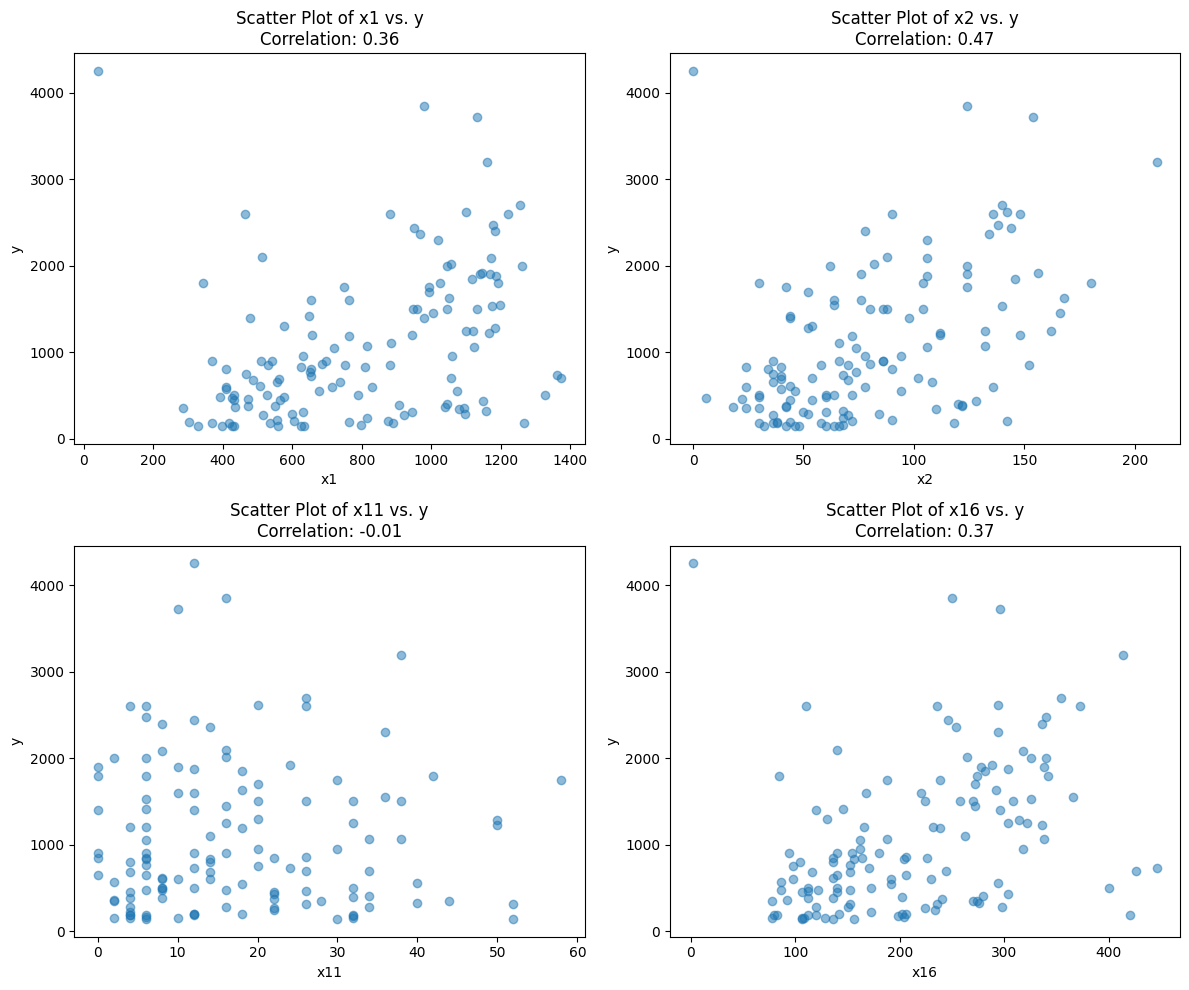

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate correlation coefficients
correlations = {
    'x1': np.corrcoef(X['x1'], y)[0, 1],
    'x2': np.corrcoef(X['x2'], y)[0, 1],
    'x11': np.corrcoef(X['x11'], y)[0, 1],
    'x16': np.corrcoef(X['x16'], y)[0, 1],
}

# Scatter plot for attributes x1, x2, x5, and x9 against target y
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.scatter(X['x1'], y, alpha=0.5)
plt.xlabel('x1')
plt.ylabel('y')
plt.title(f'Scatter Plot of x1 vs. y\nCorrelation: {correlations["x1"]:.2f}')

plt.subplot(2, 2, 2)
plt.scatter(X['x2'], y, alpha=0.5)
plt.xlabel('x2')
plt.ylabel('y')
plt.title(f'Scatter Plot of x2 vs. y\nCorrelation: {correlations["x2"]:.2f}')

plt.subplot(2, 2, 3)
plt.scatter(X['x11'], y, alpha=0.5)
plt.xlabel('x11')
plt.ylabel('y')
plt.title(f'Scatter Plot of x11 vs. y\nCorrelation: {correlations["x11"]:.2f}')

plt.subplot(2, 2, 4)
plt.scatter(X['x16'], y, alpha=0.5)
plt.xlabel('x16')
plt.ylabel('y')
plt.title(f'Scatter Plot of x16 vs. y\nCorrelation: {correlations["x16"]:.2f}')

plt.tight_layout()
plt.show()
